In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day0.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PN

In [18]:
from os import listdir
from matplotlib import image
import cv2
# load all images in a directory
test_images = list()
y_test = list()
for filename in listdir('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/NORMAL'):
    img_data = cv2.imread('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/NORMAL/' + filename, 0)
    test_images.append(img_data)
    y_test.append(0)

In [19]:
from os import listdir
from matplotlib import image
# load all images in a directory
for filename in listdir('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA'):
    img_data = cv2.imread('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/' + filename, 0)
    test_images.append(img_data)
    y_test.append(1)

In [20]:
from os import listdir
from matplotlib import image
import cv2
# load all images in a directory
train_images = list()
y_train = list()
for filename in listdir('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL'):
    img_data = cv2.imread('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/' + filename, 0)
    train_images.append(img_data)
    y_train.append(0)

In [21]:
from os import listdir
from matplotlib import image
# load all images in a directory
for filename in listdir('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA'):
    img_data = cv2.imread('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA/' + filename, 0)
    train_images.append(img_data)
    y_train.append(1)

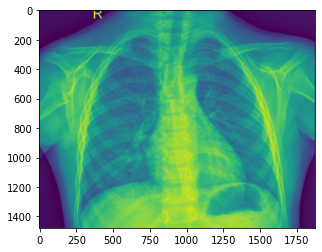

In [22]:
import matplotlib.pyplot as plt
plt.imshow(train_images[73])

In [23]:
import numpy as np
train_images = np.asarray(train_images)
y_train = np.asarray(y_train)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [24]:
import numpy as np
test_images = np.asarray(test_images)
y_test = np.asarray(y_test)

In [25]:
test_images[1].shape

(2296, 2496)

In [26]:
import cv2
x_train2 = []
for img in train_images:
    if len(img.shape)==2:
        img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
        x_train2.append(img)
x_train = np.array(x_train2).reshape(len(x_train2),256,256,1)

In [27]:
import cv2
x_test2 = []
for img in test_images:
    if len(img.shape)==2:
        img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
        x_test2.append(img)
x_test = np.array(x_test2).reshape(len(x_test2),256,256,1)

In [28]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

In [29]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [30]:
n_classes = 2
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [33]:
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(256,256,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(2, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
2/2 [==============================] - 7s 2s/step - loss: 10.8710 - accuracy: 0.4884 - val_loss: 17.1703 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 6s 2s/step - loss: 15.0528 - accuracy: 0.5078 - val_loss: 39.7222 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 6s 2s/step - loss: 47.9722 - accuracy: 0.4974 - val_loss: 18.3608 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 6s 2s/step - loss: 25.9312 - accuracy: 0.5218 - val_loss: 9.4049 - val_accuracy: 0.7000
Epoch 5/20
2/2 [==============================] - 6s 2s/step - loss: 16.3034 - accuracy: 0.5607 - val_loss: 10.9716 - val_accuracy: 0.7000
Epoch 6/20
2/2 [==============================] - 6s 2s/step - loss: 16.6470 - accuracy: 0.6097 - val_loss: 0.5592 - val_accuracy: 0.9750
Epoch 7/20
2/2 [==============================] - 6s 2s/step - loss: 2.6739 - accuracy: 0.9064 - val_loss: 0.1080 - val_accuracy: 0.9750
Epoch 8/20
2/2 [===============

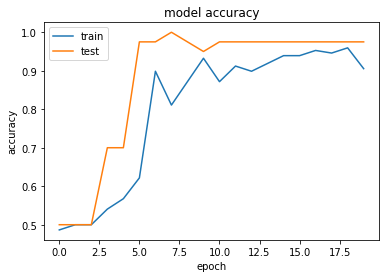

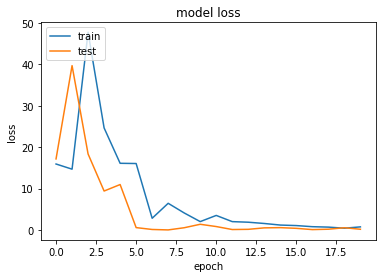

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()